In [1]:
import pandas as pd
import random

In [2]:
leng = 10000000
data = { 'a': (random.randint(0, 100) for _ in range(leng)),
     'b': (random.randint(2, 200) for _ in range(leng))}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,a,b
0,38,59
1,91,172
2,16,75
3,74,28
4,7,164


In [5]:
df.std()

a    29.152669
b    57.450031
dtype: float64

In [6]:
import dask.dataframe as dd

In [7]:
ddf = dd.from_pandas(df, npartitions=3)

In [8]:
ddf

,a,b
npartitions=3,,
0,int64,int64
3333334,...,...
6666667,...,...
9999999,...,...


In [9]:
ddf.std()

Dask Series Structure:
npartitions=1
a    float64
b        ...
Dask Name: sqrt, 4 expressions
Expr=MapPartitions(sqrt)

In [10]:
ddf.std().compute()

a    29.152669
b    57.450031
dtype: float64

In [12]:
result = ddf.a.sum() - ddf.b.sum()

In [13]:
result

<dask_expr.expr.Scalar: expr=df['a'].sum() - df['b'].sum(), dtype=int64>

In [14]:
result.compute()

np.int64(-509995977)

In [23]:
result.dask #old way do not show graph now 

{('sub-be9ab426aca90618b9d1b848402ba01f',
  0): <Task ('sub-be9ab426aca90618b9d1b848402ba01f', 0) sub(...)>,
 ('sum-tree-f1bc39f3840d1eba66bbf8012da9798e',
  0): (<function dask.utils.apply(func, args, kwargs=None)>,
  <bound method Reduction.aggregate of <class 'dask.dataframe.dask_expr._reductions.Sum'>>,
  [[('chunk-f63f92a9a2712e1e02fd96a55f49b7d1', 0),
    ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1', 1),
    ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1', 2)]],
  {'skipna': True, 'axis': 0}),
 ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1',
  0): <Task ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1', 0) chunk(..., ...)>,
 ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1',
  1): <Task ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1', 1) chunk(..., ...)>,
 ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1',
  2): <Task ('chunk-f63f92a9a2712e1e02fd96a55f49b7d1', 2) chunk(..., ...)>,
 ('getitem-243be722ece3496d3081771d4b986da5',
  0): <Task ('getitem-243be722ece3496d3081771d4b986da5', 0) getitem(...)>,
 ('getitem-243be722ece3

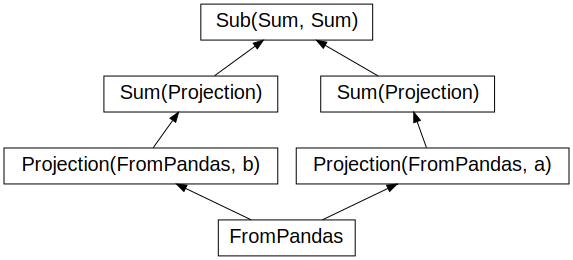

In [25]:
result.visualize() #new way need to install graphviz also 